<a href="https://colab.research.google.com/github/MMaxG/Image-Detection-CatOrDog/blob/main/AI_Exercise6_CNN_Max_Gr%C3%B6nlund_CatsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
image_directory = "train/"
SIZE=150
dataset= []
label=[]
animal_images = os.listdir(image_directory)
# Make cats zeroes ( cat = 0 ) and dogs ones ( dog = 1)
for i, image_name in enumerate(animal_images):
  #print(i, "reading", image_name.split('.')[0])
  if (image_name.split('.')[0] == 'cat'):
    image = cv2.imread(image_directory + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE, SIZE))
    dataset.append(np.array(image))
    label.append(0)
  else:
    image = cv2.imread(image_directory + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE, SIZE))
    dataset.append(np.array(image))
    label.append(1)

0 reading dog
1 reading dog
2 reading cat
3 reading cat
4 reading dog
5 reading cat
6 reading cat
7 reading dog
8 reading cat
9 reading cat
10 reading cat
11 reading cat
12 reading cat
13 reading cat
14 reading cat
15 reading cat
16 reading cat
17 reading cat
18 reading cat
19 reading cat
20 reading cat
21 reading cat
22 reading cat
23 reading cat
24 reading cat
25 reading cat
26 reading dog
27 reading cat
28 reading cat
29 reading cat
30 reading cat
31 reading cat
32 reading cat
33 reading dog
34 reading cat
35 reading dog
36 reading dog
37 reading dog
38 reading dog
39 reading dog
40 reading dog
41 reading cat
42 reading dog
43 reading cat
44 reading cat
45 reading dog
46 reading dog
47 reading dog
48 reading dog
49 reading cat
50 reading cat
51 reading dog
52 reading cat
53 reading cat
54 reading cat
55 reading cat
56 reading cat
57 reading cat
58 reading cat
59 reading cat
60 reading cat
61 reading cat
62 reading cat
63 reading cat
64 reading cat
65 reading dog
66 reading cat
67 re

In [ ]:
dataset = np.array(dataset)
label = np.array(label)
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)


In [ ]:
# Normalization
from keras.utils import normalize
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [ ]:
INPUT_SHAPE = (SIZE, SIZE, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=1, validation_data=(X_test, y_test), shuffle = False)

34/34 [==============================] - 98s 3s/step - loss: 0.6210 - accuracy: 0.7976 - val_loss: 0.5286 - val_accuracy: 0.7804


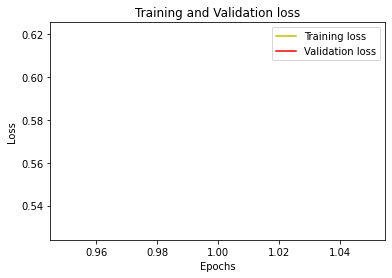

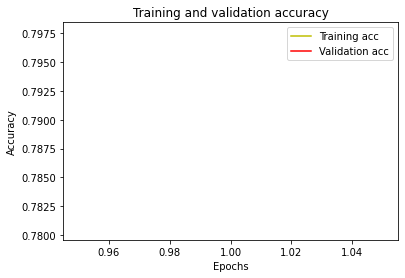

In [ ]:
# Plotting the data
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label="Training acc")
plt.plot(epochs, val_acc, 'r', label="Validation acc")
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

1/1 [==============================] - 0s 26ms/step
Prediction: [[0.21681002]] 
Actual: 0


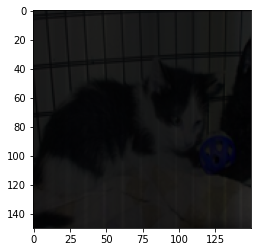

In [ ]:
# Demo
# 0 = cat, 1 = dog
import random
n=random.randint(0, len(y_test))
img = X_test[n]
plt.imshow(img)
input_img=np.expand_dims(img, axis=0)
print("Prediction:", model.predict(input_img), "\nActual:", y_test[n])

In [ ]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy: {:.1f} %".format(acc*100))

17/17 [==============================] - 4s 230ms/step - loss: 0.5286 - accuracy: 0.7804
Accuracy: 78.0 %
